In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import netCDF4
from matplotlib import dates as mdates
import geopandas as gpd

In [2]:
plt.rcParams['font.family'] = 'MS Gothic'
plt.rcParams['font.size'] = 12

In [3]:
basedir = "C:/Users/ishid/"

# 栄養塩の量

In [42]:
#pandas 読み込み
df = pd.read_csv(f"{basedir}data/kokyo/csv/DIN濃度.csv")
df

,流入地点,DIN(μM),flux,DIN(mg/L),地点,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,芝浦,1935,4.80,27.1000,芝浦東系＋本系,*24時間試験平均値による,NaN,NaN,NaN,NaN,NaN,NaN
1,砂町,714,3.50,10.0000,砂町,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,有明,478,0.11,6.7000,有明,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,葛西,678,3.07,9.5000,葛西,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,森ヶ崎,1442,12.90,20.2000,森ヶ崎,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,鶴見川,535,4.10,7.5000,亀の子橋,*公共用水域水質測定結果による(年平均値),NaN,NaN,NaN,NaN,NaN,NaN
6,荒川,331,70.00,4.6290,葛西橋,*以下公共用水域水質測定結果による(1月と書いていないものは12月と２月の値から内挿),NaN,NaN,NaN,NaN,NaN,NaN
7,隅田川,355,34.00,4.9695,両国橋,Shibaura,Sunamachi,Ariake,AMorigasaki,Kasai,BMorigasaki,Cmorigasaki
8,江戸川,256,16.20,3.5800,浦安橋,4.8,3.5,0.11,4.33,3.07,4.33,4.33
9,多摩川,265,21.60,3.7100,大師橋,NaN,NaN,NaN,NaN,NaN,NaN,NaN


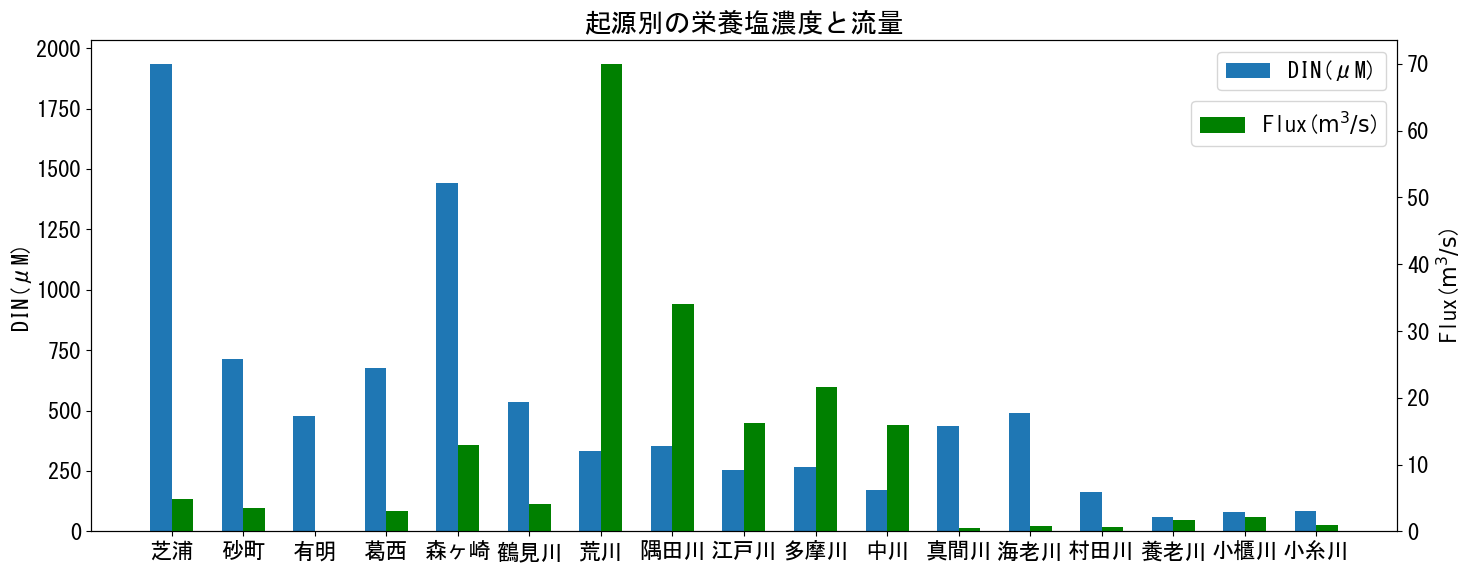

In [89]:
fig,ax = plt.subplots(1,1,figsize=(15,6),facecolor='white')
ax.bar(df["流入地点"][:17],df["DIN(μM)"][:17],align="edge",width=-0.3,label="DIN(μM)")
ax2=ax.twinx()
ax2.bar(df["流入地点"][:17],df["flux"][:17],width=0.3,align="edge",color="green",label="Flux($\mathrm{m^3/s}$)")
ax2.set_ylabel("Flux($\mathrm{m^3/s}$)")
ax.set_ylabel("DIN(μM)");ax.set_title("起源別の栄養塩濃度と流量");ax.legend();ax2.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.9))
plt.xticks(rotation=60);plt.tight_layout()
plt.show()
fig.savefig("./thesis/nutrient_inflow.png",bbox_inches='tight',dpi=600)

# 漁場の分布図の作成

AttributeError: 'AxesSubplot' object has no attribute 'coastlines'

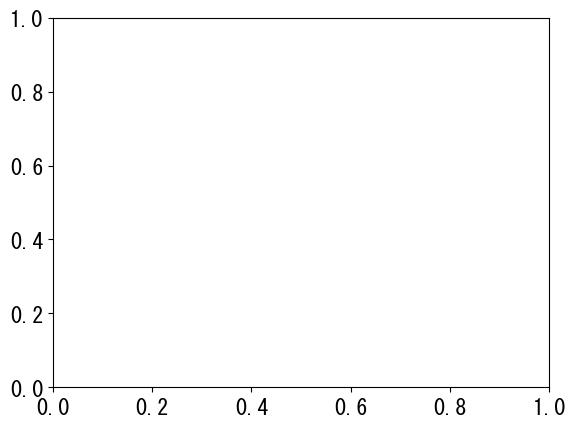

In [90]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
fig,ax = plt.subplots()
ax.coastlines(resolution='10m')
ax.set_extent([120,150,20,50], ccrs.PlateCarree())
ax.set_title('10m coastline')

In [5]:
path =f"{basedir}Github/OceanMesh2D/datasets/GML/C23-06_TOKYOBAY.shp"
data = gpd.read_file(path, encoding = 'sjis')
import pyproj
from shapely.geometry import Point
epsg3857 = pyproj.Proj(proj='longlat', ellps='GRS80').srs
#print(data.head())
pos = (139.7528, 35.685175) # (longitude, lattitude), 1-1 Chiyoda, Chiyoda-ku, Tokyo
ip = gpd.GeoDataFrame([[Point(pos[0], pos[1])]], geometry='geometry', crs=epsg3857, columns=['geometry'])
ip = ip.to_crs(crs=epsg3857)





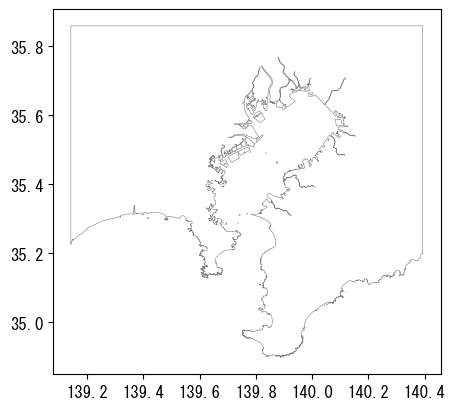

In [7]:
fig, axs = plt.subplots(figsize=(5,6));data.plot(ax=axs,color="grey",lw=0.4)
fig.savefig('shp.png',dpi=600)

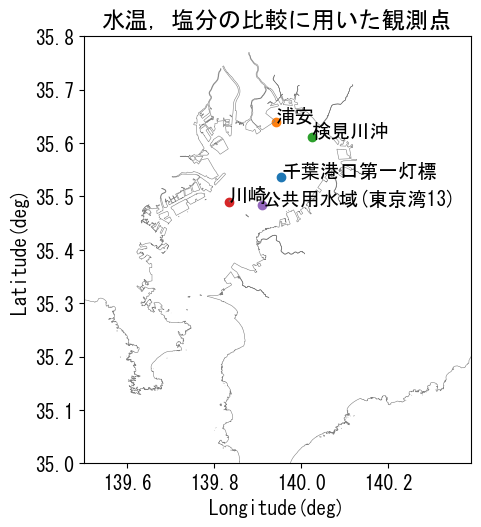

In [69]:
fig, axs = plt.subplots(figsize=(5,6))
axs.set_title('水温，塩分の比較に用いた観測点')
plt.rcParams['font.size'] = 14
#plt.rcParams['font.family'] = 'VL Gothic'
nums = ["千葉港口第一灯標","浦安","検見川沖","川崎","公共用水域(東京湾13)"]
ys = [35.53703833,35.640085,35.61095833,35.490278,35.483889]
xs = [139.9542517,139.9417417,140.0233033,139.834167,139.910556]
for xss,yss,num in zip(xs,ys,nums):
    axs.scatter(xss,yss,label=num)
    axs.text(xss,yss,num)
axs.set_aspect('equal');axs.set_ylim(35.0,35.8);axs.set_xlim(139.5,140.39)
axs.set_ylabel("Latitude(deg)");axs.set_xlabel("Longitude(deg)")
data.plot(ax=axs,color="grey",lw=0.4)
fig.savefig("plot_moniteringpost.png",dpi=600,bbox_inches='tight')

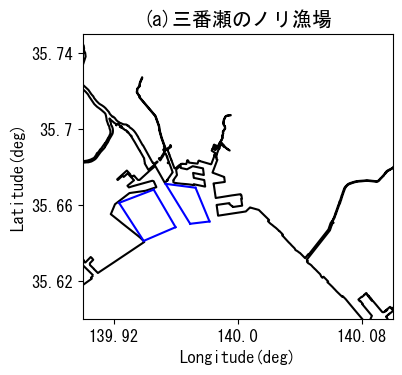

In [150]:
fig, ax = plt.subplots(figsize=(4,4))
plt.rcParams['font.size'] = 12
ax.set_title("(a)三番瀬のノリ漁場")
ax.set_ylim(35.6,35.75);ax.set_xlim(139.9,140.1);ax.set_xticks([139.92, 140.0 ,140.08]);ax.set_xticklabels([139.92,140.0 ,140.08])
ax.set_yticks([35.62, 35.66 ,35.70, 35.74]);ax.set_yticklabels([35.62, 35.66 ,35.70, 35.74])
ax.set_ylabel("Latitude(deg)");ax.set_xlabel("Longitude(deg)")
data.plot(ax=ax,color="black")
ax.plot([139.93942,139.96],[35.64125,35.64846],color='blue')
ax.plot([139.96,139.94588],[35.64846,35.66822],color='blue')
ax.plot([139.94588,139.92355],[35.66822,35.66126],color='blue')
ax.plot([139.92355,139.93942],[35.66126,35.64125],color='blue')

ax.plot([139.96942,139.9819],[35.65025,35.65146],color='blue')
ax.plot([139.9819,139.97288],[35.65146,35.66922],color='blue')
ax.plot([139.97288,139.95355],[35.66922,35.67126],color='blue')
ax.plot([139.95355,139.96942],[35.67126,35.65025],color='blue')
plt.show()
fig.savefig("./thesis/Sanbanze_nori.png",dpi=600,bbox_inches='tight')

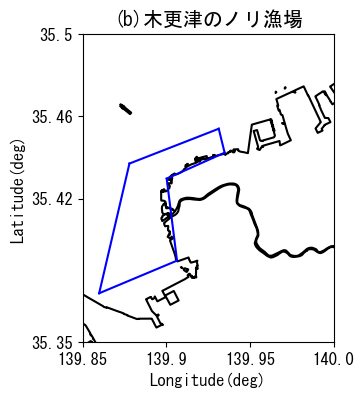

In [177]:
fig, ax = plt.subplots(figsize=(4,4))
plt.rcParams['font.size'] = 12
ax.set_title("(b)木更津のノリ漁場")
ax.set_ylim(35.35,35.50);ax.set_xlim(139.85,140.0);ax.set_xticks([139.85,139.90 ,139.95 ,140.0]);ax.set_xticklabels([139.85,139.90 ,139.95 ,140.0])
ax.set_yticks([35.35, 35.42 ,35.46, 35.50]);ax.set_yticklabels([35.35, 35.42 ,35.46, 35.50])
ax.set_ylabel("Latitude(deg)");ax.set_xlabel("Longitude(deg)")
data.plot(ax=ax,color="black")
ax.plot([139.85992,139.906422],[35.3739,35.3897809],color='blue')
ax.plot([139.906422,139.90026],[35.3897809,35.4297257],color='blue')
ax.plot([139.90026,139.93486],[35.4297257,35.44236],color='blue')
ax.plot([139.93486,139.93134],[35.44236,35.45401],color='blue')
ax.plot([139.93134,139.878],[35.45401,35.43706],color='blue')
ax.plot([139.878,139.85992],[35.43706,35.3739],color='blue')

plt.show()
fig.savefig("./thesis/Kisarazu_nori.png",dpi=600,bbox_inches='tight')

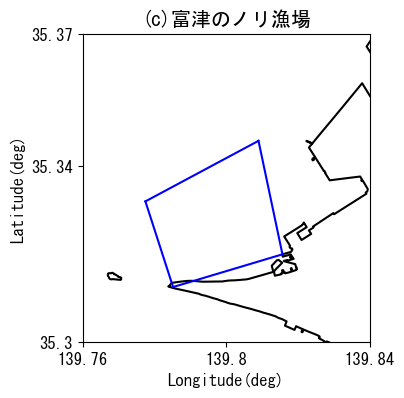

In [176]:
fig, ax = plt.subplots(figsize=(4,4))
plt.rcParams['font.size'] = 12
ax.set_title("(c)富津のノリ漁場")
ax.set_ylim(35.30,35.37);ax.set_xlim(139.76,139.84);ax.set_xticks([139.76, 139.80 ,139.84]);ax.set_xticklabels([139.76, 139.80 ,139.84])
ax.set_yticks([35.30, 35.34 ,35.37]);ax.set_yticklabels([35.30, 35.34 ,35.37])
ax.set_ylabel("Latitude(deg)");ax.set_xlabel("Longitude(deg)")
data.plot(ax=ax,color="black")
ax.plot([139.78523,139.81572],[35.31256,35.32000],color='blue')
ax.plot([139.81572,139.80904],[35.32000,35.34579],color='blue')
ax.plot([139.80904,139.77752],[35.34579,35.33203],color='blue')
ax.plot([139.77752,139.78523],[35.33203,35.31256],color='blue')


plt.show()
fig.savefig("./thesis/futtsu_nori.png",dpi=600,bbox_inches='tight')

# 栄養塩平面コンターの作成

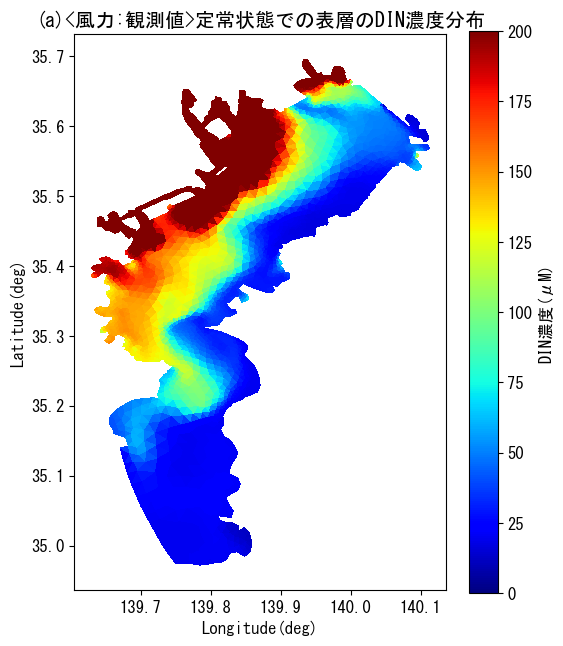

In [9]:
from pyproj import Proj
nc = netCDF4.Dataset("./exp31/exp0_0001.nc",'r')
#for Ugrid component
x =nc.variables['x'][:]
y =nc.variables['y'][:]

e2u_conv=Proj(proj='utm', zone=54, ellps='WGS84')
#Convert UTM2EQA
rslt = [e2u_conv(lon,lat,inverse=True) for lon,lat in zip(x,y)]
x = [rslt[i][0] for i in range(len(rslt))]
y = [rslt[i][1] for i in range(len(rslt))]
triangles = nc.variables['nv'][:].T-1 #-1 for python index


fig,axs = plt.subplots(figsize=(6,10))
axs.set_aspect('equal')
axs.set_ylabel('Latitude(deg)')
axs.set_xlabel('Longitude(deg)')
axs.set_title('(a)<風力:観測値>定常状態での表層のDIN濃度分布')

pcolor = axs.tripcolor(x,y,nc.variables['DYE'][40,0,:],triangles=triangles,vmin=0,vmax=200,cmap='jet')
fig.colorbar(pcolor,label='DIN濃度(μM)',shrink=0.73)
fig.savefig("./thesis/DIN_t40_upper_wvar.png",dpi=300,bbox_inches='tight')

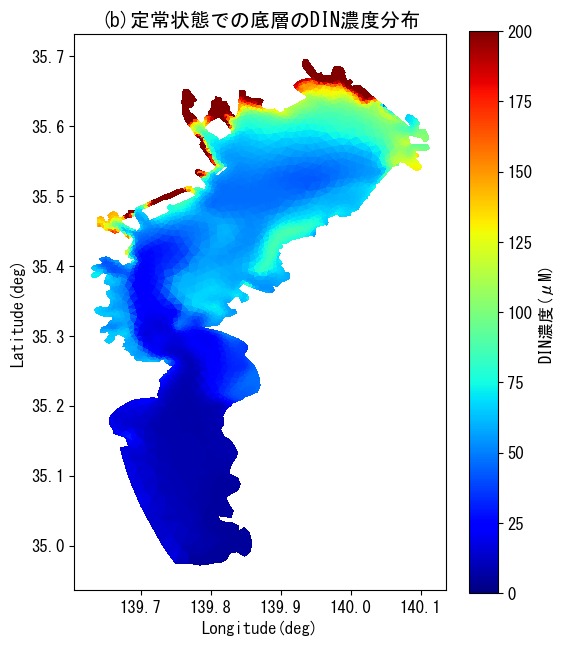

In [12]:
fig,axs = plt.subplots(figsize=(6,10))
axs.set_aspect('equal')
axs.set_ylabel('Latitude(deg)')
axs.set_xlabel('Longitude(deg)')
axs.set_title('(b)定常状態での底層のDIN濃度分布')

pcolor = axs.tripcolor(x,y,nc.variables['DYE'][40,29,:],triangles=triangles,vmin=0,vmax=200,cmap='jet')
fig.colorbar(pcolor,label='DIN濃度(μM)',shrink=0.73)
fig.savefig("./thesis/DIN_t40_bottom_wvar.png",dpi=300,bbox_inches='tight')

## 森ヶ崎での狭領域でのプロット

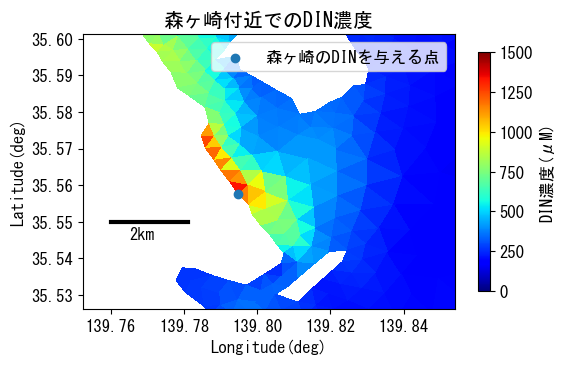

In [47]:
fig,axs = plt.subplots(figsize=(6,10))
axs.set_aspect('equal')
axs.set_ylabel('Latitude(deg)')
axs.set_xlabel('Longitude(deg)')
axs.set_title('森ヶ崎付近でのDIN濃度')

pcolor = axs.tripcolor(x,y,nc.variables['DYE'][54,0,:],triangles=triangles,vmin=0,vmax=1500,cmap='jet')
fig.colorbar(pcolor,label='DIN濃度(μM)',shrink=0.31)
axs.plot([139.76,139.781],[35.55,35.55],color='black',lw=3)
axs.text(139.765,35.545,s="2km")
axs.scatter(139.794851,35.557505,label="森ヶ崎のDINを与える点");axs.legend()
axs.set_ylim(35.5261,35.6013);axs.set_xlim(139.7523,139.8539)
fig.savefig("./thesis/DIN_morigasaki.png",dpi=600,bbox_inches='tight')

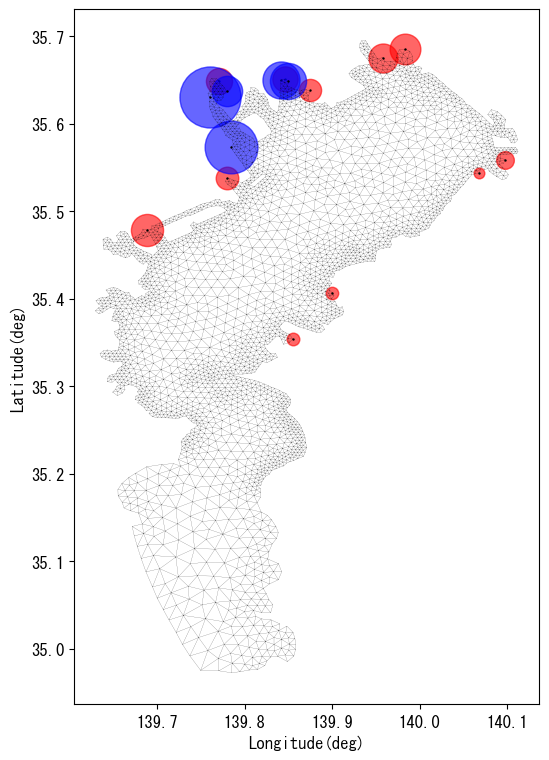

In [88]:
from pyproj import Proj
nc = netCDF4.Dataset("./exp31/exp0_0001.nc",'r')
#for Ugrid component
x =nc.variables['x'][:]
y =nc.variables['y'][:]

e2u_conv=Proj(proj='utm', zone=54, ellps='WGS84')
#Convert UTM2EQA
rslt = [e2u_conv(lon,lat,inverse=True) for lon,lat in zip(x,y)]
x = [rslt[i][0] for i in range(len(rslt))]
y = [rslt[i][1] for i in range(len(rslt))]
triangles = nc.variables['nv'][:].T-1 #-1 for python index


fig,axs = plt.subplots(figsize=(6,10))
#ys = [35.62,35.565,35.423]
#xs = [140.005,139.85,139.86]
#for xss,yss,num in zip(xs,ys,nums):
#    axs.scatter(xss,yss,label=num)
#    axs.text(xss,yss,num)
river = [[139.845775,35.6508944],[139.7706,35.6492],[139.875,35.6381],[139.77952,35.53742],[139.68882,35.4788964],[139.95811,35.67567],\
        [139.98282,35.68541],[140.068112,35.5434873],[139.900121,35.4065832],[139.854841,35.3538399],[140.097814,35.55895546]]
size=[331,355,256,265,535,436,490,59,80,83,162]
sewer = [[139.760232,35.6306492],[139.840939,35.6499421],[139.77941,35.6369688],[139.78472,35.57362],[139.850022,35.649112]]
sizes=[1935,714,478,1442,678]
for i,r in enumerate(river):
    axs.scatter(r[0],r[1],c='red',s=size[i],alpha=0.6,label='河川')
    axs.scatter(r[0],r[1],c='black',s=0.5)
   # axs.text(r[0],r[1],s=str(size[i]));axs.scatter(r[0],r[1],c='black',s=1.0)
for i,s in enumerate(sewer):
    axs.scatter(s[0],s[1],c='blue',s=sizes[i],alpha=0.6,label='下水道')#,marker="D"
   # if i == 1:
   #     axs.text(s[0],s[1]+0.015,s=str(sizes[i]))
  #  elif i == 4:
   #     axs.text(s[0]-0.008,s[1]-0.014,s=str(sizes[i]))
   # else:
   #     axs.text(s[0],s[1]-0.01,s=str(sizes[i]))
    axs.scatter(s[0],s[1],c='black',s=0.5)
axs.set_aspect('equal')
axs.set_ylabel('Latitude(deg)')
axs.set_xlabel('Longitude(deg)')
#axs.legend(ncols=3)
#axs.set_title('(a)<風力:観測値>定常状態での表層のDIN濃度分布')
axs.triplot(x,y,triangles,lw=0.1,color='black')
plt.show()
fig.savefig('DIN_conmap.png',dpi=600)

In [ ]:
芝浦	1935	4.8
砂町	714	3.5
有明	478	0.11
葛西	678	3.07
森ヶ崎	1442	12.9
鶴見川	535	4.1
荒川	331	70
隅田川	355	34
江戸川	256	16.2
多摩川	265	21.6
中川	171	16
真間川	436	0.45
海老川	490	0.76
村田川	162	0.63
養老川	59	1.68
小櫃川	80	2.17
小糸川	83	0.95


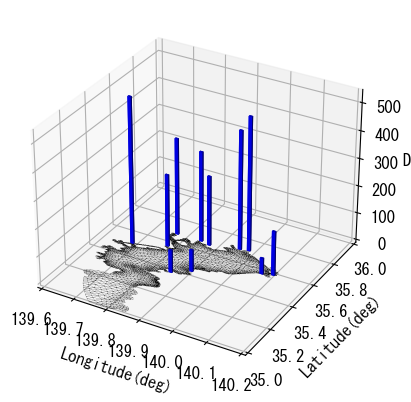

In [83]:
from pyproj import Proj
nc = netCDF4.Dataset("./exp31/exp0_0001.nc",'r')
#for Ugrid component
x =nc.variables['x'][:]
y =nc.variables['y'][:]

e2u_conv=Proj(proj='utm', zone=54, ellps='WGS84')
#Convert UTM2EQA
rslt = [e2u_conv(lon,lat,inverse=True) for lon,lat in zip(x,y)]
x = [rslt[i][0] for i in range(len(rslt))]
y = [rslt[i][1] for i in range(len(rslt))]
triangles = nc.variables['nv'][:].T-1 #-1 for python index


#fig,axs = plt.subplots(figsize=(6,10))
fig = plt.figure()
axs = fig.add_subplot(111,projection='3d')
#ys = [35.62,35.565,35.423]
#xs = [140.005,139.85,139.86]
#for xss,yss,num in zip(xs,ys,nums):
#    axs.scatter(xss,yss,label=num)
#    axs.text(xss,yss,num)
river = [[139.845775,35.6508944],[139.7706,35.6492],[139.875,35.6381],[139.77952,35.53742],[139.68882,35.4788964],[139.95811,35.67567],\
        [139.98282,35.68541],[140.068112,35.5434873],[139.900121,35.4065832],[139.854841,35.3538399],[140.097814,35.55895546]]
size=[331,355,256,265,535,436,490,59,80,83,162]
sewer = [[139.760232,35.6306492],[139.840939,35.6499421],[139.77941,35.6369688],[139.78472,35.57362],[139.850022,35.649112]]
sizes=[1935,714,478,1442,678]
for i,r in enumerate(river):
    #axs.scatter(r[0],r[1],c='red',s=size[i]*1.0**2,alpha=0.2,label='河川')
    axs.bar3d(r[0],r[1],0,0.01,0.01,size[i],color='blue')
   # axs.text(r[0],r[1],s=str(size[i]));axs.scatter(r[0],r[1],c='black',s=1.0)
#for i,s in enumerate(sewer):
   # axs.scatter(s[0],s[1],c='blue',s=sizes[i]*1.0**2,alpha=0.3,label='下水道')#,marker="D"
   # if i == 1:
   #     axs.text(s[0],s[1]+0.015,s=str(sizes[i]))
   # elif i == 4:
   #     axs.text(s[0]-0.008,s[1]-0.014,s=str(sizes[i]))
   # else:
   #     axs.text(s[0],s[1]-0.01,s=str(sizes[i]))
   # axs.scatter(s[0],s[1],c='black',s=1.0)
#axs.set_aspect('equal')
axs.set_ylabel('Latitude(deg)')
axs.set_xlabel('Longitude(deg)')
axs.set_zlabel('DIN')
plt.xlim(139.6,140.2);plt.ylim(35,36)
#axs.legend(ncols=3)
#axs.set_title('(a)<風力:観測値>定常状態での表層のDIN濃度分布')
axs.triplot(x,y,triangles,lw=0.1,color='black')
plt.show()
fig.savefig('DIN_conmap.png',dpi=600)